In [5]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import pickle

from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
tuples_noattack = pd.read_csv("../ejecuciones_cartpole/cartpole_noattack.csv")

In [3]:
tuples_noattack.head()

,state_0,state_1,state_2,state_3,action,next_state_0,next_state_1,next_state_2,next_state_3,reward
0,-0.004717,0.009161,-0.032313,-0.016046,0.0,-0.004534,-0.185483,-0.032634,0.266269,1.0
1,-0.004534,-0.185483,-0.032634,0.266269,0.0,-0.008244,-0.380125,-0.027309,0.548483,1.0
2,-0.008244,-0.380125,-0.027309,0.548483,0.0,-0.015846,-0.574853,-0.016339,0.832438,1.0
3,-0.015846,-0.574853,-0.016339,0.832438,0.0,-0.027343,-0.769747,0.000310,1.119938,1.0
4,-0.027343,-0.769747,0.000310,1.119938,0.0,-0.042738,-0.964873,0.022709,1.412718,1.0


In [6]:
normalize = True
if normalize:
    norm_filepath = "minmaxscaler_cartpole.pkl"
    min_max_scaler = pickle.load(open(norm_filepath, "rb"))
    x_scaled = min_max_scaler.transform(tuples_noattack.values)
    tuples_noattack = pd.DataFrame(x_scaled, columns=tuples_noattack.columns)

In [7]:
pca_2d = PCA(n_components=2)
tuples_2d_noattack = pd.DataFrame(pca_2d.fit_transform(tuples_noattack))

In [8]:
tuples_2d_noattack.columns = ["PC1_2d", "PC2_2d"]
tuples_2d_noattack.head()

,PC1_2d,PC2_2d
0,-0.497045,0.630637
1,-0.496714,0.598323
2,-0.495671,0.581547
3,-0.493912,0.580271
4,-0.491428,0.594533


[Text(0.5, 1.0, "Tuplas 'noattack'")]

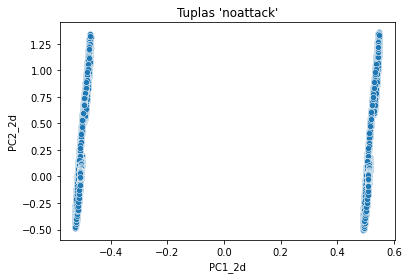

In [9]:
sns.scatterplot(data=tuples_2d_noattack, x='PC1_2d', y='PC2_2d').set(title="Tuplas 'noattack'")

### Linear Regression

In [7]:
# Create linear regression object
regr = linear_model.LinearRegression()

X = tuples_2d_noattack.PC1_2d.values.reshape(-1, 1)
y = tuples_2d_noattack.PC2_2d.values.reshape(-1, 1)

In [8]:
# Train the model using the training sets
regr.fit(X, y)

LinearRegression()

In [9]:
# Make predictions using the testing set
y_pred = regr.predict(X)

In [10]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, y_pred))

Coefficients: 
 [[-7.94782859e-17]]
Mean squared error: 0.15
Coefficient of determination: 0.00


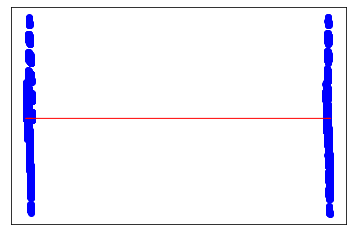

In [11]:
# Plot outputs
plt.scatter(X, y, color="blue")
plt.plot(X, y_pred, color="red", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

### Interpolacion

In [10]:
# Create a linear interpolation function based on the original data
linear_interpolation_func = scipy.interpolate.interp1d(tuples_2d_noattack.PC1_2d, tuples_2d_noattack.PC2_2d, kind='linear')

In [11]:
pc1_max = np.max(tuples_2d_noattack.PC1_2d.values)
pc1_min = np.min(tuples_2d_noattack.PC1_2d.values)
print("MAX PC1_2D:", pc1_max)
print("MIN PC1_2D:", pc1_min)

MAX PC1_2D: 0.5476314686495681
MIN PC1_2D: -0.5255893582810532


In [12]:
in_between_scale = np.linspace(pc1_min, pc1_max, 100)

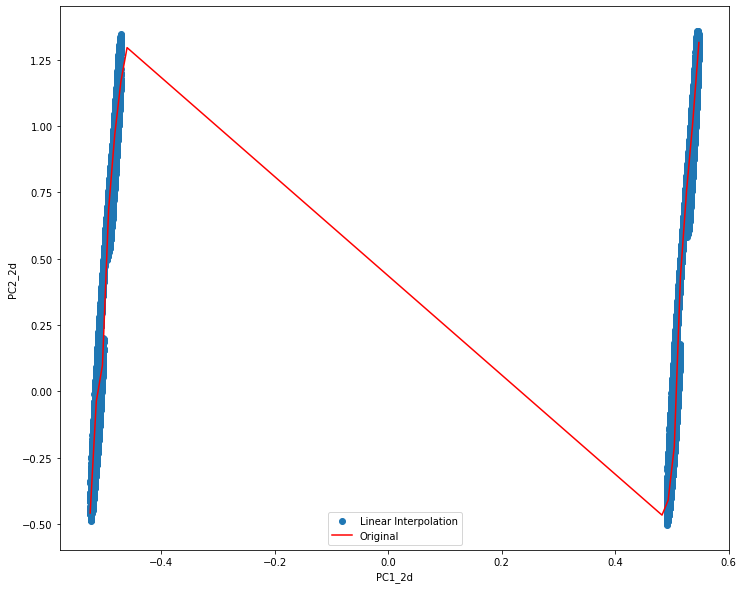

In [13]:
linear_interpolated_y = linear_interpolation_func(in_between_scale)

# Plot the result
plt.figure(figsize=(12,10))
plt.scatter(tuples_2d_noattack.PC1_2d, tuples_2d_noattack.PC2_2d)
plt.plot(in_between_scale, linear_interpolated_y, 'red')
plt.legend(['Linear Interpolation', 'Original'])
plt.xlabel('PC1_2d')
plt.ylabel('PC2_2d')
plt.show()

In [16]:
# Ahora me invento un punto (0.25, -0.5)
invent_y = linear_interpolation_func(0.25)
print("Para x = 0.25, y =", invent_y)

Para x = 0.25, y = 0.34196816569472854


In [17]:
distancia_punto_interpolacion = abs(-0.5 - invent_y)
print("Pero el punto era (0.25, -0.5)")
print("Distancia punto-a-interpolacion", distancia_punto_interpolacion)

Pero el punto era (0.25, -0.5)
Distancia punto-a-interpolacion 0.8419681656947285


In [18]:
distancias_punto_interpolacion = []
for punto in tuples_2d_noattack.values:
    x = punto[0]
    y = punto[1]
    pred_y = linear_interpolation_func(x)
    distancia = abs(y-pred_y)
    distancias_punto_interpolacion.append(distancia)

In [19]:
print("DISTACIA MAX:", np.max(distancias_punto_interpolacion))
print("DISTACIA MIN:", np.min(distancias_punto_interpolacion))
print("DISTACIA AVG:", np.average(distancias_punto_interpolacion))
print("DISTACIA STD:", np.std(distancias_punto_interpolacion))
print("DISTACIA VAR:", np.var(distancias_punto_interpolacion))

DISTACIA MAX: 0.0
DISTACIA MIN: 0.0
DISTACIA AVG: 0.0
DISTACIA STD: 0.0
DISTACIA VAR: 0.0


### Pruebas interpolacion sobre estados atacados

In [20]:
tuples_attack = pd.read_csv("../ejecuciones_cartpole/cartpole_attack.csv")

In [21]:
tuples_attack.head()

,state_0,state_1,state_2,state_3,action,next_state_0,next_state_1,next_state_2,next_state_3,reward
0,0.082503,0.060246,0.097906,0.040503,0.0,0.032708,-0.185529,0.047716,0.297907,1.0
1,0.032708,-0.185529,0.047716,0.297907,0.0,0.078997,-0.331298,0.103674,0.655249,1.0
2,0.078997,-0.331298,0.103674,0.655249,0.0,0.021372,-0.577128,0.065779,0.914344,1.0
3,0.021372,-0.577128,0.065779,0.914344,0.0,0.009829,-0.773075,0.084066,1.226954,1.0
4,0.009829,-0.773075,0.084066,1.226954,1.0,0.044367,-0.529130,0.158605,1.011750,1.0


In [22]:
tuples_2d_attack = pd.DataFrame(pca_2d.transform(tuples_attack))
tuples_2d_attack.columns = ["PC1_2d", "PC2_2d"]
tuples_2d_attack.head()

,PC1_2d,PC2_2d
0,-0.544120,0.051290
1,-0.554317,0.512291
2,-0.547661,0.973568
3,-0.553946,1.437547
4,0.556628,1.457258


[Text(0.5, 1.0, "Tuplas 'attacked'")]

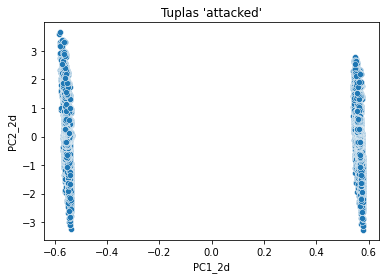

In [23]:
sns.scatterplot(data=tuples_2d_attack, x='PC1_2d', y='PC2_2d').set(title="Tuplas 'attacked'")

In [24]:
estados_atacados = []
for punto in tuples_2d_attack.values:
    distancia = math.inf
    anomalo = False
    x = punto[0]
    y = punto[1]
    
    try:
        pred_y = linear_interpolation_func(x)
        distancia = abs(y-pred_y)
        if distancia > 0.01:
            anomalo = True
    except ValueError:
        anomalo = True
    
    estados_atacados.append([x,y,distancia,anomalo])
estados_atacados_df = pd.DataFrame(data=estados_atacados, columns=["PC1_2d", "PC2_2d", "distancia", "anomalo"])

In [25]:
estados_atacados_df.head()

,PC1_2d,PC2_2d,distancia,anomalo
0,-0.544120,0.051290,0.851131,True
1,-0.554317,0.512291,0.703460,True
2,-0.547661,0.973568,2.104663,True
3,-0.553946,1.437547,1.526250,True
4,0.556628,1.457258,1.206472,True


In [26]:
estados_atacados_df['anomalo'].value_counts()

True     256251
False      4318
Name: anomalo, dtype: int64

[Text(0.5, 1.0, "Estados anomalos de 'cartpole_attack'")]

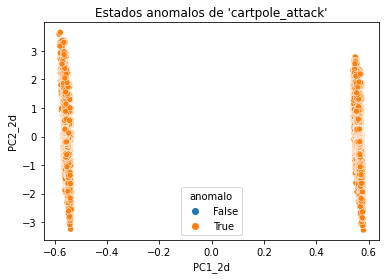

In [27]:
sns.scatterplot(data=estados_atacados_df, x='PC1_2d', y='PC2_2d', hue='anomalo').set(title="Estados anomalos de 'cartpole_attack'")

In [28]:
pc1_left_mean = tuples_2d_noattack[tuples_2d_noattack['PC1_2d']<0].PC1_2d.mean()
pc1_right_mean = tuples_2d_noattack[tuples_2d_noattack['PC1_2d']>0].PC1_2d.mean()
pc2_max = np.max(tuples_2d_noattack.PC2_2d.values)
pc2_min = np.min(tuples_2d_noattack.PC2_2d.values)
print("PC1_2d LEFT MEAN:", pc1_left_mean)
print("PC1_2d RIGHT MEAN:", pc1_right_mean)
print("PC2_2d MAX", pc2_max)
print("PC2_2d MIN", pc2_min)

conf_factor = 0.01
estados_atacados_2 = []
for punto in tuples_2d_attack.values:
    anomalo = True
    x = punto[0]
    y = punto[1]
    
    if (1+conf_factor)*pc1_left_mean <= x <= pc1_left_mean*(1-conf_factor):
        anomalo = False
    if (1-conf_factor)*pc1_right_mean <= x <= pc1_right_mean*(1+conf_factor):
        anomalo = False
        
    if y > pc2_max or y < pc2_min:
        anomalo = True
    
    estados_atacados_2.append([x,y,anomalo])
estados_atacados_df_2 = pd.DataFrame(data=estados_atacados_2, columns=["PC1_2d", "PC2_2d", "anomalo"])

PC1_2d LEFT MEAN: -0.5583553107536166
PC1_2d RIGHT MEAN: 0.5583553107536167
PC2_2d MAX 2.3468945171077564
PC2_2d MIN -2.21759685928121


In [29]:
estados_atacados_df_2['anomalo'].value_counts()

False    177276
True      83293
Name: anomalo, dtype: int64

[Text(0.5, 1.0, "Estados anomalos de 'cartpole_attack'")]

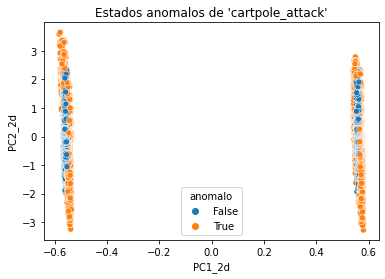

In [30]:
sns.scatterplot(data=estados_atacados_df_2, x='PC1_2d', y='PC2_2d', hue='anomalo').set(title="Estados anomalos de 'cartpole_attack'")